## 抽取部分数据用于前端数据可视化

In [1]:
import pandas as pd

In [2]:
# 基本信息
user_info_cloumns = ['user_id', 'sex', 'occupation', 'education', 'marriage', 'household_type']
user_info_test = pd.read_table("../data/test/user_info_test.txt", names=user_info_cloumns, sep=',')

# 银行流水记录
bank_detail_columns = ['user_id', 'time', 'deal_type', 'deal_amount', 'wage_type']
bank_detail_test = pd.read_table("../data/test/bank_detail_test.txt", names=bank_detail_columns, sep=',')

# 浏览记录
browse_history_columns = ['user_id', 'time', 'browse_behavior', 'browse_subbehavior']
browse_history_test = pd.read_table("../data/test/browse_history_test.txt", names=browse_history_columns, sep=',')

# 信用卡账单记录
bill_detail_columns = ['user_id', 'time', 'bank_id', 'previous_bills', 'previous_repayment', 'creditCardQuota', 
                       'current_balance', 'current_MinRepay', 'consume_times', 'current_bills', 'adjust_money',
                       'revolving_interest', 'available_money', 'cash_Advance_Limit', 'repayment_status']
bill_detail_test = pd.read_table("../data/test/bill_detail_test.txt", names=bill_detail_columns, sep=',')

# 放款时间
loan_time_columns = ['user_id', 'time']
loan_time_test = pd.read_table("../data/test/loan_time_test.txt", names=loan_time_columns, sep=',')

In [5]:
# 显示贷款人基本信息
user_info_test.to_excel("../data/ui/user_info.xlsx", index=False)

### 折线图

In [100]:
# 某一用户支出随时间戳的变化折线图
rule = (bank_detail_test['deal_type'] == 1) & (bank_detail_test['time'] > 0)
expen = bank_detail_test.loc[rule, ['user_id', 'time', 'deal_amount']]
expen.to_excel("../data/ui/expen.xlsx", index=False)

In [111]:
# 某一用户收入随时间戳的变化折线图
rule = (bank_detail_test['deal_type'] == 0) & (bank_detail_test['time'] > 0)
income = bank_detail_test.loc[rule, ['user_id', 'time', 'deal_amount']]
income.to_excel("../data/ui/income.xlsx", index=False)

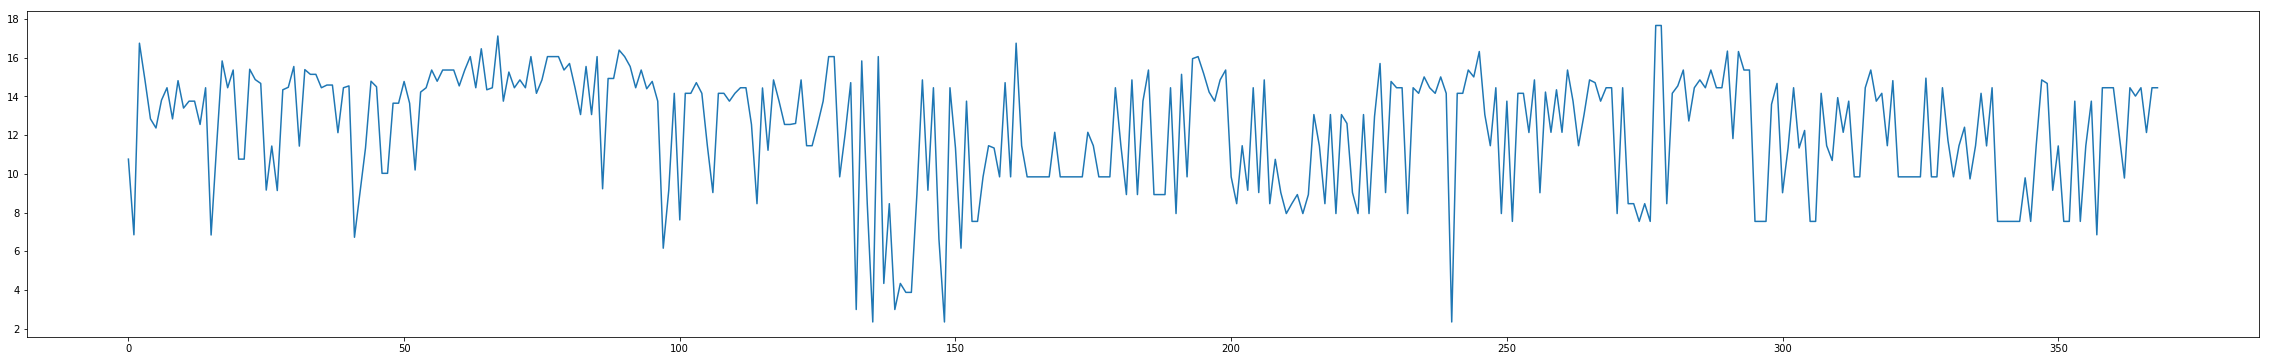

In [102]:
import numpy as np

test = expen[expen['user_id'] == 57189]
plt.subplots(figsize=(40, 6))
plt.plot(range(test.shape[0]), test['deal_amount'])
plt.show()

### 用户不同浏览行为柱状图

- 横轴表示不同的行为类别  
- 纵轴表示每种行为出现次数的统计

In [88]:
browse_history_test.drop(['time'], axis=1).to_excel("../data/ui/browse_history.xlsx", index=False)

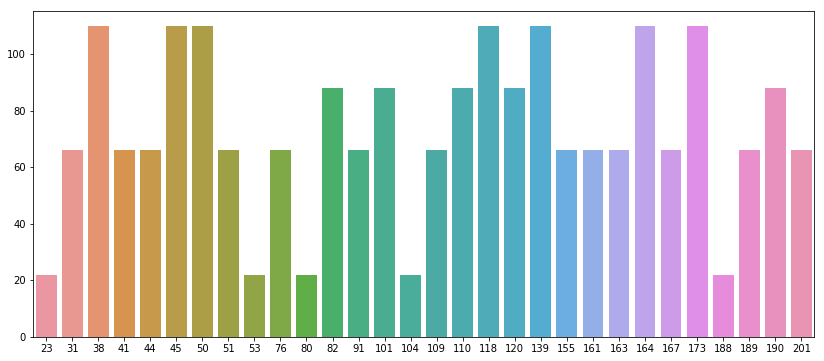

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

test = browse_history_test[browse_history_test['user_id'] == 64809]
count = test['browse_behavior'].value_counts()
plt.subplots(figsize=(14, 6))
sns.barplot(count.keys(), count.values)
plt.show()

In [118]:
bill_detail_test.to_excel("../data/ui/bill_detail.xlsx", index=False)